In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import psycopg2

# with open('/Users/shreya/Documents/ernie_password.txt') as f:
#     ernie_password = f.readline()

# conn=psycopg2.connect(database="ernie",user="shreya",host="localhost",password=ernie_password)
# conn.set_client_encoding('UTF8')
# conn.autocommit=True
# curs=conn.cursor()

# # Set schema
# schema = "theta_plus"
# set_schema = "SET SEARCH_PATH TO " + schema + ";"   
# curs.execute(set_schema)


# weights = ['ncf', 'now', 'sf'] 
# inflation = ['20', '30', '40', '60']

# # all_data_table = 'dc_bc_merged'


# # for name in weights:
# #     for val in inflation:

# for name in weights[:1]:
#     for val in inflation[:1]:
        
# #         cluster_table = name + '_' + str(val) + '_ids'
#         cluster_table = 'now' + '_' + str(20) + '_ids'

#         print("Querying: ", cluster_table)

#         query1 = "select dbm.cited_1, dbm.cited_2, clt1.cluster as cited_1_cluster, clt2.cluster as cited_2_cluster from dc_bc_merged as dbm join " + cluster_table + " as clt1 on dbm.cited_1 = clt1.scp join " + cluster_table + " as clt2 on dbm.cited_2 = clt2.scp"
#         query2 = "select cluster, count(cluster) as cluster_counts from " + cluster_table + " group by cluster order by cluster;"
        
#         conductance_data = pd.read_sql(query1, conn)
#         counts_data = pd.read_sql(query2, conn)
        
#         x1 = conductance_data[conductance_data.cited_2_cluster != conductance_data.cited_1_cluster][['cited_1', 'cited_1_cluster']].groupby('cited_1_cluster', as_index=False).agg('count').rename(columns = {'cited_1': 'ext_out'})
#         x2 = conductance_data[conductance_data.cited_2_cluster != conductance_data.cited_1_cluster][['cited_2', 'cited_2_cluster']].groupby('cited_2_cluster', as_index=False).agg('count').rename(columns = {'cited_2': 'ext_in'})
#         x3 = conductance_data[conductance_data.cited_2_cluster == conductance_data.cited_1_cluster][['cited_1', 'cited_2_cluster']].groupby('cited_2_cluster', as_index=False).agg('count').rename(columns = {'cited_1': 'int_edges'})
#         x1_clusters = counts_data.merge(x1, left_on = 'cluster', right_on = 'cited_1_cluster', how = 'left')[['cluster', 'ext_out']]
#         x1_clusters = x1_clusters.fillna(0)
#         x2_clusters = counts_data.merge(x2, left_on = 'cluster', right_on = 'cited_2_cluster', how = 'left')[['cluster', 'ext_in']]
#         x2_clusters = x2_clusters.fillna(0)
#         x3_clusters = counts_data.merge(x3, left_on = 'cluster', right_on = 'cited_2_cluster', how = 'left')[['cluster', 'int_edges', 'cluster_counts']]
#         x3_clusters = x3_clusters.fillna(0)
#         x4 = x1_clusters.merge(x2_clusters, left_on='cluster', right_on='cluster', how = 'inner')
#         x5 = x4.merge(x3_clusters, left_on='cluster', right_on='cluster')
#         x5['boundary'] = x5['ext_in'] + x5['ext_out']
#         x5['volume'] = x5['ext_in'] + x5['ext_out'] + 2*x5['int_edges']
#         x5['two_m'] = conductance_data.shape[0]*2
#         x5['alt_denom'] = x5['two_m'] - x5['volume']
#         x5['denom'] = x5[['alt_denom', 'volume']].min(axis=1)
#         x5['conductance'] = round((x5['boundary']/x5['denom']), 2)

# #         save_name = '/Users/shreya/Documents/mcl_jsd/conductance/' + name + '_' + str(val) + '_conductance.csv'

# #         print("Done. Saving to CSV.")
        
# #         x5.to_csv(save_name, index = None, header=True, encoding='utf-8')


        
        



In [1]:
import pandas as pd

In [3]:
nodes_data = pd.read_csv("/Users/shreya/Documents/mcl/immunology/imm1990_testcase_asjc2403_citing_cited.csv")
nodes_data.head()

,citing,cited
0,25306251,5844258322
1,38641941,25098538
2,84864628996,25330501
3,27248349,25687903
4,31033198,25284590


In [7]:
unshuffled_cluster_data = pd.read_csv("/Users/shreya/Documents/mcl/immunology/unshuffled_imm1990_cluster_list.csv")
unshuffled_cluster_data.head()

,cluster_no,scp
0,1,75149149112
1,1,25100777
2,1,81155149504
3,1,33656875
4,1,36156857


In [8]:
# ------------- UNSHUFFLED ------------- #

# Reading in scp and cluster files separately 

nodes_data = pd.read_csv("/Users/shreya/Documents/mcl/immunology/imm1990_testcase_asjc2403_citing_cited.csv")
# nodes_data.rename(columns={'scp':'citing', 'ref_sgr':'cited'}, inplace=True)

unshuffled_cluster_data = pd.read_csv("/Users/shreya/Documents/mcl/immunology/unshuffled_imm1990_cluster_list.csv")
unshuffled_all_data = nodes_data.merge(unshuffled_cluster_data, left_on='citing', right_on='scp', how='inner').rename(columns={'cluster_no':'citing_cluster'}).merge(unshuffled_cluster_data, left_on='cited', right_on='scp', how='inner').rename(columns={'cluster_no':'cited_cluster'})

unshuffled_all_data = unshuffled_all_data[['citing', 'cited', 'citing_cluster', 'cited_cluster']]

conductance_data = unshuffled_all_data

counts_data = unshuffled_cluster_data.groupby('cluster_no', as_index=False).agg('count').rename(columns={'cluster_no':'cluster', 'scp':'cluster_counts'})

x1 = conductance_data[conductance_data.cited_cluster != conductance_data.citing_cluster][['citing', 'citing_cluster']].groupby('citing_cluster', as_index=False).agg('count').rename(columns = {'citing': 'ext_out'})
x2 = conductance_data[conductance_data.cited_cluster != conductance_data.citing_cluster][['cited', 'cited_cluster']].groupby('cited_cluster', as_index=False).agg('count').rename(columns = {'cited': 'ext_in'})
x3 = conductance_data[conductance_data.cited_cluster == conductance_data.citing_cluster][['citing', 'cited_cluster']].groupby('cited_cluster', as_index=False).agg('count').rename(columns = {'citing': 'int_edges'})

x1_clusters = counts_data.merge(x1, left_on = 'cluster', right_on = 'citing_cluster', how = 'left')[['cluster', 'ext_out']]
x1_clusters = x1_clusters.fillna(0)
x2_clusters = counts_data.merge(x2, left_on = 'cluster', right_on = 'cited_cluster', how = 'left')[['cluster', 'ext_in']]
x2_clusters = x2_clusters.fillna(0)
x3_clusters = counts_data.merge(x3, left_on = 'cluster', right_on = 'cited_cluster', how = 'left')[['cluster', 'int_edges', 'cluster_counts']]
x3_clusters = x3_clusters.fillna(0)

x4 = x1_clusters.merge(x2_clusters, left_on='cluster', right_on='cluster', how = 'inner')
x5 = x4.merge(x3_clusters, left_on='cluster', right_on='cluster')
x5['boundary'] = x5['ext_in'] + x5['ext_out']
x5['volume'] = x5['ext_in'] + x5['ext_out'] + 2*x5['int_edges']
x5['two_m'] = conductance_data.shape[0]*2
x5['alt_denom'] = x5['two_m'] - x5['volume']
x5['denom'] = x5[['alt_denom', 'volume']].min(axis=1)
x5['conductance'] = round((x5['boundary']/x5['denom']), 2)

In [9]:
x5.head()

,cluster,ext_out,ext_in,int_edges,cluster_counts,boundary,volume,two_m,alt_denom,denom,conductance
0,1,746.0,420.0,1760.0,1721,1166.0,4686.0,1323296,1318610.0,4686.0,0.25
1,2,315.0,564.0,1171.0,1171,879.0,3221.0,1323296,1320075.0,3221.0,0.27
2,3,95.0,188.0,696.0,697,283.0,1675.0,1323296,1321621.0,1675.0,0.17
3,4,23.0,73.0,669.0,670,96.0,1434.0,1323296,1321862.0,1434.0,0.07
4,5,1.0,103.0,668.0,669,104.0,1440.0,1323296,1321856.0,1440.0,0.07


In [11]:
save_name = '/Users/shreya/Documents/mcl/immunology/conductance_unshuffled.csv'

print("Done. Saving to CSV.")

x5.to_csv(save_name, index = None, header=True, encoding='utf-8')

Done. Saving to CSV.


In [12]:

# ------------- SHUFFLED ------------- #

# Reading in scp and cluster files separately 

nodes_data = pd.read_csv("/Users/shreya/Documents/mcl/immunology/imm1990_testcase_asjc2403_citing_cited.csv")
# nodes_data.rename(columns={'scp':'citing', 'ref_sgr':'cited'}, inplace=True)

shuffled_cluster_data = pd.read_csv("/Users/shreya/Documents/mcl/immunology/shuffled_imm1990_cluster_list.csv")


shuffled_all_data = nodes_data.merge(shuffled_cluster_data, left_on='citing', right_on='scp', how='inner').rename(columns={'cluster_no':'citing_cluster'}).merge(shuffled_cluster_data, left_on='cited', right_on='scp', how='inner').rename(columns={'cluster_no':'cited_cluster'})
shuffled_all_data = shuffled_all_data[['citing', 'cited', 'citing_cluster', 'cited_cluster']]


conductance_data = shuffled_all_data

counts_data = shuffled_cluster_data.groupby('cluster_no', as_index=False).agg('count').rename(columns={'cluster_no':'cluster', 'scp':'cluster_counts'})

shuffled_counts_data = counts_data

x1 = conductance_data[conductance_data.cited_cluster != conductance_data.citing_cluster][['citing', 'citing_cluster']].groupby('citing_cluster', as_index=False).agg('count').rename(columns = {'citing': 'ext_out'})
x2 = conductance_data[conductance_data.cited_cluster != conductance_data.citing_cluster][['cited', 'cited_cluster']].groupby('cited_cluster', as_index=False).agg('count').rename(columns = {'cited': 'ext_in'})
x3 = conductance_data[conductance_data.cited_cluster == conductance_data.citing_cluster][['citing', 'cited_cluster']].groupby('cited_cluster', as_index=False).agg('count').rename(columns = {'citing': 'int_edges'})

x1_clusters = counts_data.merge(x1, left_on = 'cluster', right_on = 'citing_cluster', how = 'left')[['cluster', 'ext_out']]
x1_clusters = x1_clusters.fillna(0)
x2_clusters = counts_data.merge(x2, left_on = 'cluster', right_on = 'cited_cluster', how = 'left')[['cluster', 'ext_in']]
x2_clusters = x2_clusters.fillna(0)
x3_clusters = counts_data.merge(x3, left_on = 'cluster', right_on = 'cited_cluster', how = 'left')[['cluster', 'int_edges', 'cluster_counts']]
x3_clusters = x3_clusters.fillna(0)

x4 = x1_clusters.merge(x2_clusters, left_on='cluster', right_on='cluster', how = 'inner')
x5 = x4.merge(x3_clusters, left_on='cluster', right_on='cluster')
x5['boundary'] = x5['ext_in'] + x5['ext_out']
x5['volume'] = x5['ext_in'] + x5['ext_out'] + 2*x5['int_edges']
x5['two_m'] = conductance_data.shape[0]*2
x5['alt_denom'] = x5['two_m'] - x5['volume']
x5['denom'] = x5[['alt_denom', 'volume']].min(axis=1)
x5['conductance'] = round((x5['boundary']/x5['denom']), 2)


In [13]:
save_name = '/Users/shreya/Documents/mcl/immunology/conductance_shuffled.csv'

print("Done. Saving to CSV.")

x5.to_csv(save_name, index = None, header=True, encoding='utf-8')

Done. Saving to CSV.


In [ ]:
# # Reading in scp and cluster files together


# conductance_data = pd.read_csv("/Users/shreya/Documents/mcl/direct_citation/test_shuffle_merged_edgelist_clusterlist.csv")
# conductance_data.rename(columns={'scp':'citing', 'ref_sgr':'cited', 'scp_cl_no':'citing_cluster', 'ref_sgr_cl_no':'cited_cluster'}, inplace=True)

# cluster_data = pd.read_csv("/Users/shreya/Documents/mcl_jsd/consolidated_output/direct_citation/test_shuffle_million_20_clusterlist.csv")
# counts_data = cluster_data.groupby('cluster_no', as_index=False).agg('count').rename(columns={'cluster_no':'cluster', 'scp':'cluster_counts'})

# x1 = conductance_data[conductance_data.cited_cluster != conductance_data.citing_cluster][['citing', 'citing_cluster']].groupby('citing_cluster', as_index=False).agg('count').rename(columns = {'citing': 'ext_out'})
# x2 = conductance_data[conductance_data.cited_cluster != conductance_data.citing_cluster][['cited', 'cited_cluster']].groupby('cited_cluster', as_index=False).agg('count').rename(columns = {'cited': 'ext_in'})
# x3 = conductance_data[conductance_data.cited_cluster == conductance_data.citing_cluster][['citing', 'cited_cluster']].groupby('cited_cluster', as_index=False).agg('count').rename(columns = {'citing': 'int_edges'})

# x1_clusters = counts_data.merge(x1, left_on = 'cluster', right_on = 'citing_cluster', how = 'left')[['cluster', 'ext_out']]
# x1_clusters = x1_clusters.fillna(0)
# x2_clusters = counts_data.merge(x2, left_on = 'cluster', right_on = 'cited_cluster', how = 'left')[['cluster', 'ext_in']]
# x2_clusters = x2_clusters.fillna(0)
# x3_clusters = counts_data.merge(x3, left_on = 'cluster', right_on = 'cited_cluster', how = 'left')[['cluster', 'int_edges', 'cluster_counts']]
# x3_clusters = x3_clusters.fillna(0)

# x4 = x1_clusters.merge(x2_clusters, left_on='cluster', right_on='cluster', how = 'inner')
# x5 = x4.merge(x3_clusters, left_on='cluster', right_on='cluster')
# x5['boundary'] = x5['ext_in'] + x5['ext_out']
# x5['volume'] = x5['ext_in'] + x5['ext_out'] + 2*x5['int_edges']
# x5['two_m'] = conductance_data.shape[0]*2
# x5['alt_denom'] = x5['two_m'] - x5['volume']
# x5['denom'] = x5[['alt_denom', 'volume']].min(axis=1)
# x5['conductance'] = round((x5['boundary']/x5['denom']), 2)

In [12]:
# ---------- Analysis ----------- #

In [14]:
unshuffled_immuno = pd.read_csv('/Users/shreya/Documents/mcl/immunology/conductance_unshuffled.csv')
shuffled_immuno = pd.read_csv('/Users/shreya/Documents/mcl/immunology/conductance_shuffled.csv')

In [15]:
bins = [0, 10, 20, 50, 100, 200, 300, 500, 1000, 2000, 5000]

unshuffled_immuno['bins'] = pd.cut(unshuffled_immuno['cluster_counts'], bins)
shuffled_immuno['bins'] = pd.cut(shuffled_immuno['cluster_counts'], bins)

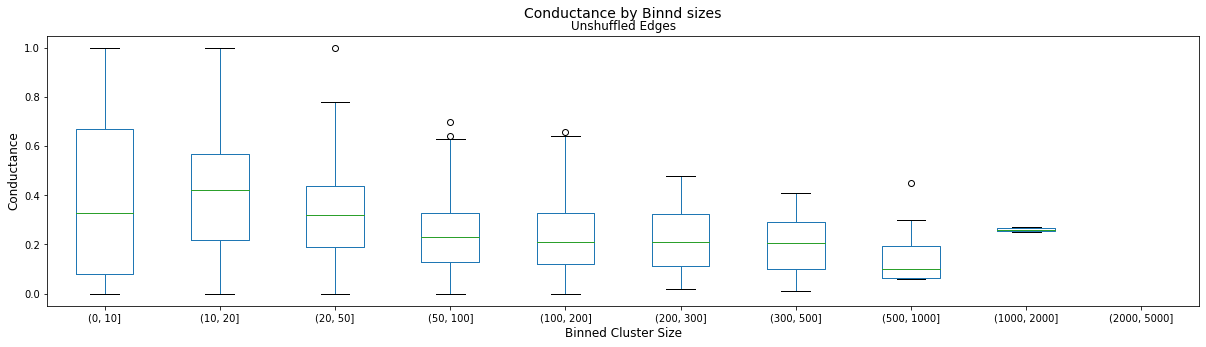

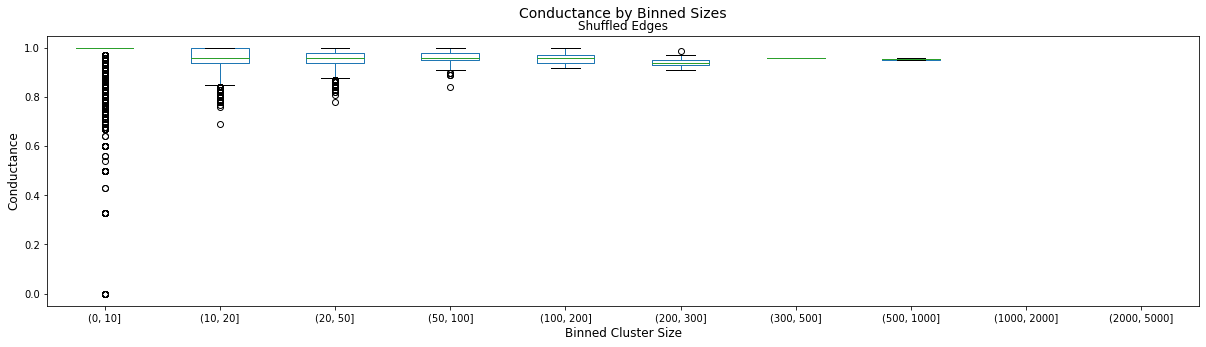

In [16]:
bp1 = unshuffled_immuno.boxplot(column ='conductance',
                               by = 'bins',
                               figsize=(20, 5),
                               grid=False)
                               

p = plt.gca()
p.set_xlabel("Binned Cluster Size", fontsize = 12)
p.set_ylabel("Conductance", fontsize = 12)
plt.suptitle("Conductance by Binnd sizes", fontsize=14)
p.set_title("Unshuffled Edges")
p.tick_params(axis='y', labelsize=10)
p.tick_params(axis='x', labelsize=10)

    
bp2 = shuffled_immuno.boxplot(column ='conductance',
                               by = 'bins',
                               figsize=(20, 5),
                               grid=False)

p = plt.gca()
p.set_xlabel("Binned Cluster Size", fontsize = 12)
p.set_ylabel("Conductance", fontsize = 12)
plt.suptitle("Conductance by Binned Sizes", fontsize=14)
p.set_title("Shuffled Edges")
p.tick_params(axis='y', labelsize=10)
p.tick_params(axis='x', labelsize=10)